# El algoritmo de Simon
---

## El problema

El **problema de Simon** consiste en determinar el periodo de una función periódica 

$$f: \{0, 1\}^n \longrightarrow \{0, 1\}^n$$

Dicho periodo es una cadena $\mathbf{c}$ de ceros y unos que tiene longitud $n$ y se cumple que para todo par de cadenas distintas:

$$f(\mathbf{x}) = f(\mathbf{x'}) \quad \Longleftrightarrow \quad \mathbf{x'} = \mathbf{x} \oplus \mathbf{c}$$  

Donde $\oplus$ es la suma binaria (o XOR) componente a componente de las cadenas sin *llevar*.

## Analogía con funciones periódicas que conocemos

<img src="seno.png">

## Un ejemplo

Imaginemos que somos "los malos" de la historia y que vamos a construir una función periódica para que "los buenos" intenten encontrar su periodo.

* Empezamos determinando el valor de $n$. Por ejemplo, $n = 3$.

* Luego determinamos el valor de $\mathbf{c}$, por ejemplo $\mathbf{c} = 110$.

* Como siguiente paso empezamos a determinar cuáles $\mathbf{x}$ y $\mathbf{x'}$ van a tener el mismo valor. Esto es muy sencillo, lo único que debemos hacer es sumarle ($\oplus$) a cada una de las cadenas de ceros y unos de longitud $n = 3$ la cadena $\mathbf{c} = 110$ y agrupar las cadena con la que iniciamos junto con la cadena que obtuvimos como resultado.

Esto lo hacemos en la siguiente tabla:

| Cadena $\mathbf{x}$ en $\{0, 1\}^3$ | Hacemos $\mathbf{x} \oplus \mathbf{c} $ | Resultado |
| ----------------------------------  | --------------------------------------- | --------- |
|            000                      |            000 $\oplus$ 110             |  110      |
|            001                      |            001 $\oplus$ 110             |  111      |
|            010                      |            010 $\oplus$ 110             |  100      |
|            011                      |            011 $\oplus$ 110             |           |
|            100                      |            100 $\oplus$ 110             |           |
|            101                      |            101 $\oplus$ 110             |           |
|            110                      |            110 $\oplus$ 110             |           |
|            111                      |            111 $\oplus$ 110             |           |


Aquí ya tenemos la tabla completa:

| Cadena $\mathbf{x}$ en $\{0, 1\}^3$ | Hacemos $\mathbf{x} \oplus \mathbf{c} $ | Resultado |
| ----------------------------------  | --------------------------------------- | --------- |
|            000                      |            000 $\oplus$ 110             |  110      |
|            001                      |            001 $\oplus$ 110             |  111      |
|            010                      |            010 $\oplus$ 110             |  100      |
|            011                      |            011 $\oplus$ 110             |  101      |
|            100                      |            100 $\oplus$ 110             |  010      |
|            101                      |            101 $\oplus$ 110             |  011     |
|            110                      |            110 $\oplus$ 110             |  000      |
|            111                      |            111 $\oplus$ 110             |  001      |

De modo que las cadenas que vemos dentro de la misma nube **deben** tener un mismo valor bajo la función $f$

<img src="diag1.png">

Como los "villanos" tenemos ahora muchas opciones para definir nuestra función. Lo único que debemos respetar es que nubes distintas vayan a valores distintos. Por ejemplo, la opción que yo escogí fue la siguiente:

<img src="diag2.png">

Ahora voy a crear el oráculo

In [1]:
from qiskit import QuantumCircuit

In [2]:
qc = QuantumCircuit(6)
qc.cx(2, 5)
qc.cx(0, 3)
qc.cx(1, 3)
qc.x(3)
qc.cx(1, 4)
qc.cx(0, 4)
orac = qc.to_gate()
orac.name = 'Oráculo Simon'

*Ahora "olvida" todo lo que acabamos de hacer pues vamos a ponernos en los zapatos de "los buenos"*

¿Puedes consultar clásicamente el oráculo? ¿Nos dan los mismos valores que lo que definieron los malos anteriormente?

In [3]:
# f(000)
circuito = QuantumCircuit(6, 3)
circuito.x(0)
circuito.x(2)
circuito.append(orac, [0, 1, 2, 3, 4, 5])
circuito.measure(3, 0)
circuito.measure(4, 1)
circuito.measure(5, 2)
circuito.draw()

┌───┐┌────────────────┐         
q_0: ┤ X ├┤0               ├─────────
     └───┘│                │         
q_1: ─────┤1               ├─────────
     ┌───┐│                │         
q_2: ┤ X ├┤2               ├─────────
     └───┘│  Oráculo Simon │┌─┐      
q_3: ─────┤3               ├┤M├──────
          │                │└╥┘┌─┐   
q_4: ─────┤4               ├─╫─┤M├───
          │                │ ║ └╥┘┌─┐
q_5: ─────┤5               ├─╫──╫─┤M├
          └────────────────┘ ║  ║ └╥┘
c_0: ════════════════════════╩══╬══╬═
                                ║  ║ 
c_1: ═══════════════════════════╩══╬═
                                   ║ 
c_2: ══════════════════════════════╩═

In [4]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

{'110': 1}


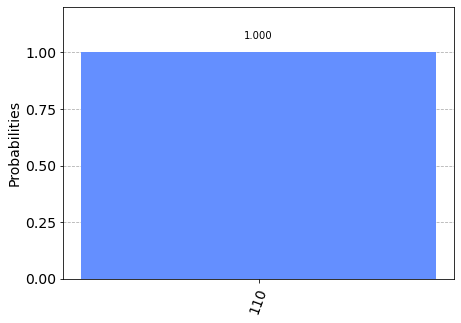

In [5]:
simulador = Aer.get_backend('qasm_simulator')
conteos = execute(circuito, backend=simulador, shots=1).result().get_counts()
print(conteos)
plot_histogram(conteos)

**Solución clásica:** Empezar a tabular valores hasta encontrar cadenas $\mathbf{x}$ y $\mathbf{x'}$ que cumplan $f(\mathbf{x}) = f(\mathbf{x'})$. El periodo buscado será 

$$\mathbf{c} = \mathbf{x} \oplus \mathbf{x'}$$

**Solución cuántica:** Implementar el algoritmo/circuito de Simon y ejecutarlo (1 shot). Los estados que obtenemos como resultados nos permitirán descifrar el valor de $\mathbf{c}$. Pues por el diseño del algoritmo los resultados $\mathbf{r}$ obtenidos cumplirán que

$$ \mathbf{c} \cdot \mathbf{r} = 0$$

Ejemplo de la operación $\cdot$ entre cadenas:

$$110 \cdot 101 = (1 \wedge 1) \oplus (1 \wedge 0) \oplus (0 \wedge 1) = 1 \oplus 0 \oplus 0 = 1$$

In [1]:
circuito = QuantumCircuit(6, 3)
circuito.h([0, 1, 2])
circuito.append(orac, [0, 1, 2, 3, 4, 5])
circuito.h([0, 1, 2])
circuito.measure([0, 1, 2], [0, 1, 2])
circuito.draw(output='mpl')

NameError: name 'QuantumCircuit' is not defined

In [7]:
simulador = Aer.get_backend('qasm_simulator')
conteos = execute(circuito, backend=simulador, shots=1).result().get_counts()
print(conteos)

{'000': 1}


**05/10/2020**

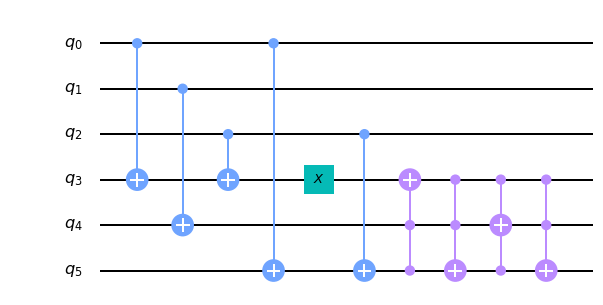

In [8]:
circuito_1 = QuantumCircuit(6)
circuito_1.cx(0,3)
circuito_1.cx(2,3)

circuito_1.x(3)
#circuito_1.barrier()
circuito_1.cx(1,4)
circuito_1.cx(0,5)
circuito_1.cx(2,5)

circuito_1.ccx(4,5,3)
circuito_1.ccx(3,4,5)
circuito_1.ccx(3,5,4)
circuito_1.ccx(3,4,5)


circuito_1.draw(output='mpl')

In [9]:
oraculo = circuito_1.to_gate()
oraculo.name = 'Oráculo Simon II'

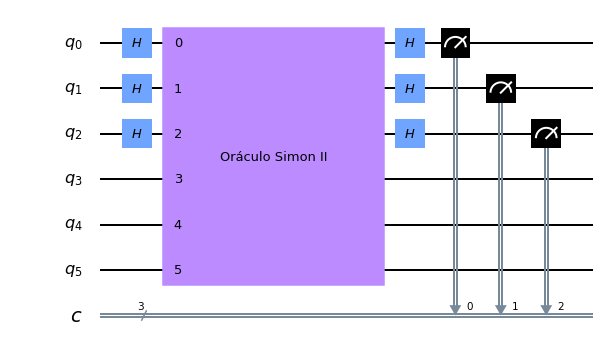

In [10]:
simon = QuantumCircuit(6, 3)
simon.h([0, 1, 2])
simon.append(oraculo, [0, 1, 2, 3, 4, 5])
simon.h([0, 1, 2])
simon.measure([0, 1, 2], [0, 1, 2])
simon.draw(output='mpl')

{'010': 1}


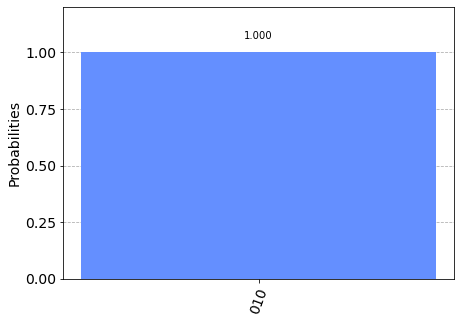

In [11]:
simulador = Aer.get_backend('qasm_simulator')
conteos_simon = execute(simon, backend=simulador, shots=1).result().get_counts()
print(conteos_simon)
plot_histogram(conteos_simon)